# Boston Housing Prices - Linear Regression

We'll use [Boston.csv](https://www.datasciencecentral.com/profiles/blogs/boston-housing-dataset-without-the-racial-profiling-field) data set in order to predict housing prices in Boston. This data is from [Kaggle competition: Housing Values in Suburbs of Boston](https://www.kaggle.com/c/boston-housing/data) without the 'black' column.

Bellow are the features and the output (MEDV):
- CRIM — per capita crime rate by town.
- ZN — proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS — proportion of non-retail business acres per town.
- CHAS — Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX — nitrogen oxides concentration (parts per 10 million).
- RM — average number of rooms per dwelling.
- AGE — proportion of owner-occupied units built prior to 1940.
- DIS — weighted mean of distances to five Boston employment centres.
- RAD — index of accessibility to radial highways.
- TAX — full-value property-tax rate per $10,000.
- PTRATIO — pupil-teacher ratio by town.
- LSTAT — lower status of the population (percent).

- MEDV — median value of owner-occupied homes in $1000s. This is the target variable.



First, let's import some useful libraries and get Spark Context, so we can load the dataset that was previously downloaded:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/jpm/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
house_df = pd.read_csv('boston.csv')

## Data exploration

In [5]:
house_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [17]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


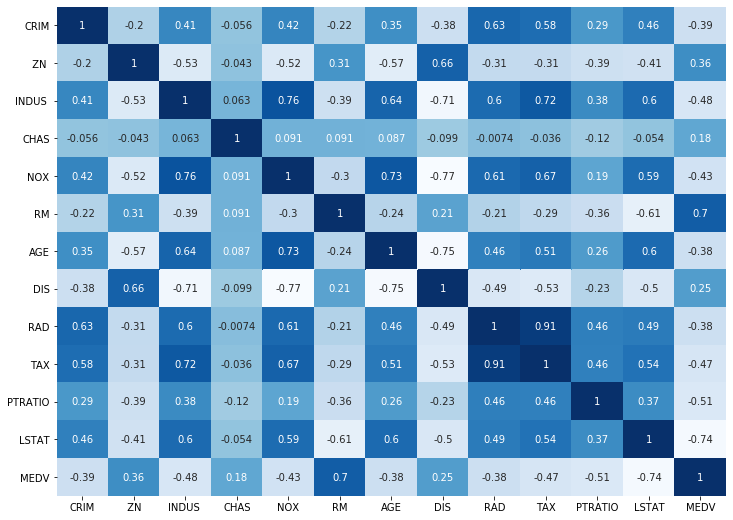

In [34]:
plt.figure(figsize=(12, 9))
sns.heatmap(house_df.corr(), cbar=False, annot=True, cmap="Blues")

In [20]:
house_df.columns

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

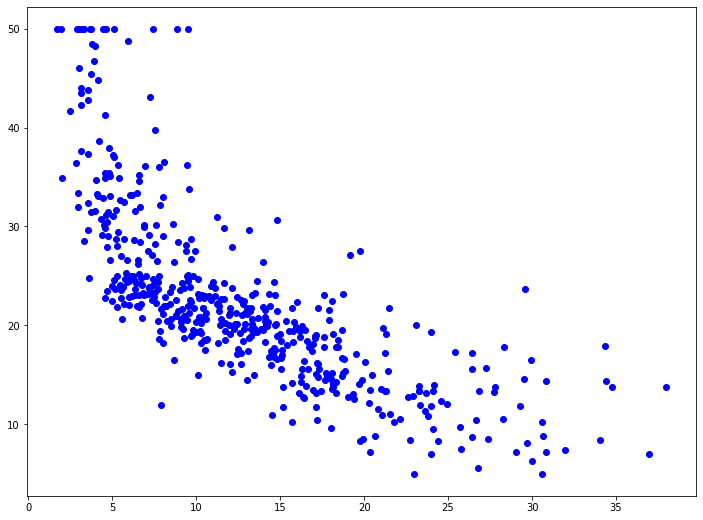

In [126]:
import matplotlib.pyplot as plt

X = pd.DataFrame(house_df.LSTAT)
y = pd.DataFrame(house_df.MEDV)

plt.figure(figsize=(12, 9))
plt.scatter(X, y,  color='blue')

### Split the data
It is necessary to split the data in 2 sets, the first for trainning and the second for tests. We'll use 70% of data for training and 40% for tests.

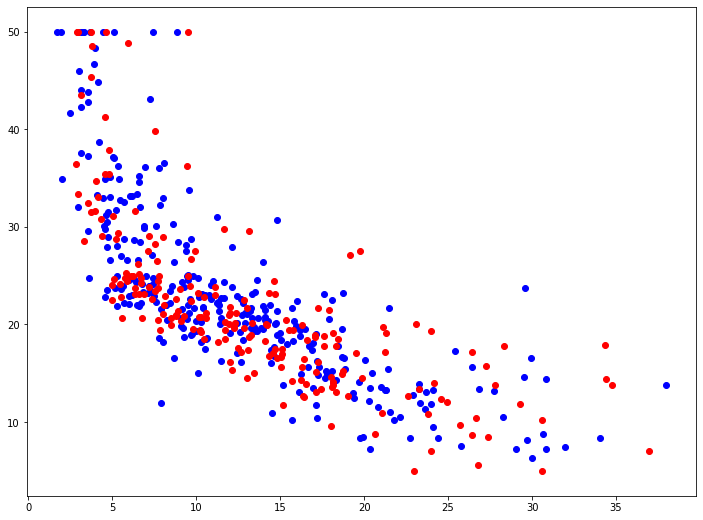

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

plt.figure(figsize=(12, 9))
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='red')

## Create, fit and evaluate the model on trainning test set

In [128]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
print('y = {0} + {1} X'.format(model.intercept_[0], model.coef_[0][0]))

y = 35.576382502789876 + -1.0136705295702848 X


In [130]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = model.predict(X_train)

# The mean squared error
print("RMSE: {0}".format(mean_squared_error(y_train, y_train_pred, squared=False)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train, y_train_pred))

RMSE: 6.23395669008294
Variance score: 0.56


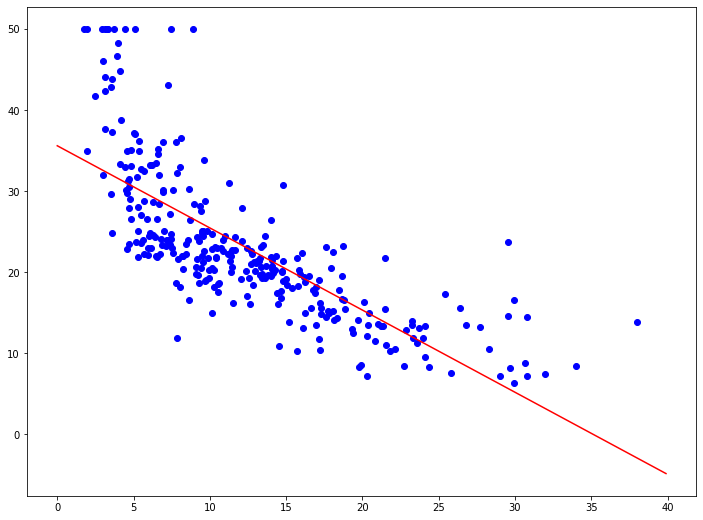

In [131]:
x_axis = np.arange(0, 40, 0.1)
f_x = model.intercept_[0] + model.coef_[0][0] * x_axis

plt.figure(figsize=(12, 9))
plt.scatter(X_train, y_train,  color='blue')
plt.plot(x_axis, f_x,  color='red')

## Evaluate the model on test set

__RMSE__ measures the differences between predicted values by the model and the actual values. However, __RMSE__ alone is meaningless until we compare with the actual “MEDV” value, such as mean, min and max. After such comparison, our RMSE looks pretty good.

__R squared__ indicates that in our model, approximate r2% of the variability in “MEDV” can be explained using the model.

In [63]:
y_pred = model.predict(X_test)

# The mean squared error
print("RMSE: {0}".format(mean_squared_error(y_test, y_pred, squared=False)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE: 6.2087305844885865
Variance score: 0.49


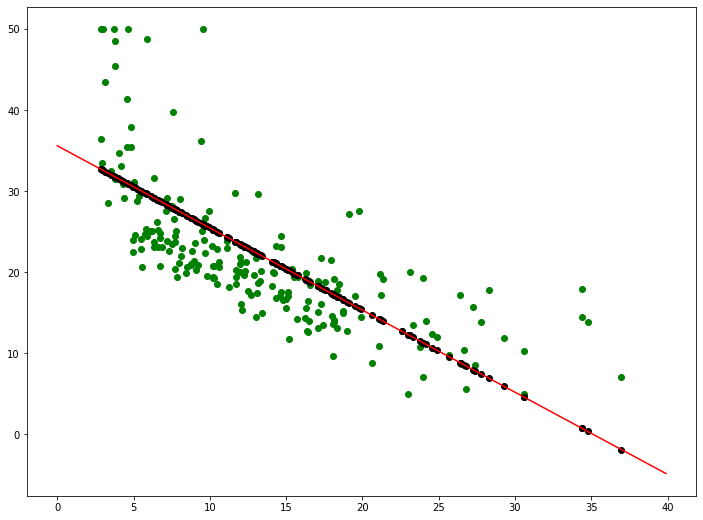

In [66]:
plt.figure(figsize=(12, 9))
plt.scatter(X_test, y_test,  color='green')
plt.scatter(X_test, y_pred,  color='black')
plt.plot(x_axis, f_x,  color='red')

## Multiple Linear Regression

Lets use all features available and analyze if the results are improved.

First, create a vector with all target values, split the data, and then create the classifier.

In [70]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(house_df.drop(['MEDV'], axis=1))
y = pd.DataFrame(house_df.MEDV)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88


In [71]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
print('y = {0} + {1} * X'.format(model.intercept_[0], model.coef_[0]))

y = 39.49819698544478 + [-1.25806631e-01  3.79315499e-02  1.93157807e-02  3.83494379e+00
 -1.45217123e+01  3.68532041e+00 -1.66861274e-02 -1.48119686e+00
  2.33549874e-01 -1.06937698e-02 -8.69517557e-01 -6.02538601e-01] * X


In [76]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)

print("RMSE: {0}".format(mean_squared_error(y_train, y_train_pred, squared=False)))
print('Variance score: %.2f' % r2_score(y_train, y_train_pred))

RMSE: 4.825305048772188
Variance score: 0.74


In [77]:
y_pred = model.predict(X_test)

print("RMSE: {0}".format(mean_squared_error(y_test, y_pred, squared=False)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE: 4.70369083835547
Variance score: 0.71


## Polynomial Regression

Lets use a polynomial regression and analyze if the results are improved.

In [91]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(house_df.LSTAT)
y = pd.DataFrame(house_df.MEDV)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test.head()

,LSTAT
173,9.04
274,3.53
491,18.07
72,5.52
452,17.27


In [98]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(2)
X_train2 = poly2.fit_transform(X_train)
X_test2 = poly2.transform(X_test)
X_test2

array([[1.0000000e+00, 9.0400000e+00, 8.1721600e+01],
       [1.0000000e+00, 3.5300000e+00, 1.2460900e+01],
       [1.0000000e+00, 1.8070000e+01, 3.2652490e+02],
       [1.0000000e+00, 5.5200000e+00, 3.0470400e+01],
       [1.0000000e+00, 1.7270000e+01, 2.9825290e+02],
       [1.0000000e+00, 1.1970000e+01, 1.4328090e+02],
       [1.0000000e+00, 1.8330000e+01, 3.3598890e+02],
       [1.0000000e+00, 2.4160000e+01, 5.8370560e+02],
       [1.0000000e+00, 1.2870000e+01, 1.6563690e+02],
       [1.0000000e+00, 1.4330000e+01, 2.0534890e+02],
       [1.0000000e+00, 1.7920000e+01, 3.2112640e+02],
       [1.0000000e+00, 1.7100000e+01, 2.9241000e+02],
       [1.0000000e+00, 3.6980000e+01, 1.3675204e+03],
       [1.0000000e+00, 1.2340000e+01, 1.5227560e+02],
       [1.0000000e+00, 1.1740000e+01, 1.3782760e+02],
       [1.0000000e+00, 1.1660000e+01, 1.3595560e+02],
       [1.0000000e+00, 1.7580000e+01, 3.0905640e+02],
       [1.0000000e+00, 3.0620000e+01, 9.3758440e+02],
       [1.0000000e+00, 2.970

In [144]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
print('y = {0} + {1} * X + {2} * X^2'.format(model2.intercept_[0], model2.coef_[0][1], model2.coef_[0][2]))

y = 43.887843708305965 + -2.4325270139744326 * X + 0.045609489749177 * X^2


In [146]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred2 = model2.predict(X_train2)

print("RMSE: {0}".format(mean_squared_error(y_train, y_train_pred2, squared=False)))
print('Variance score: %.2f' % r2_score(y_train, y_train_pred2))

RMSE: 5.524747293253539
Variance score: 0.66


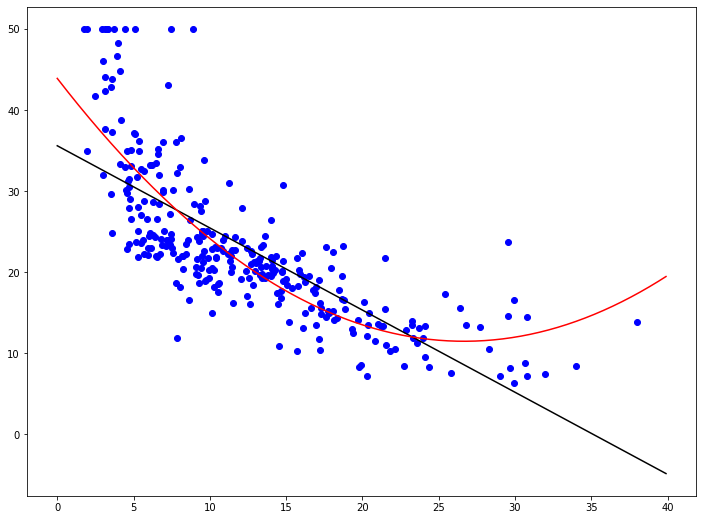

In [147]:
x_axis = np.arange(0, 40, 0.1)
f_x2 = model2.intercept_[0] + model2.coef_[0][1] * x_axis + model2.coef_[0][2] * x_axis**2

plt.figure(figsize=(12, 9))
plt.scatter(X_train, y_train,  color='blue')
plt.plot(x_axis, f_x,  color='black')
plt.plot(x_axis, f_x2,  color='red')

In [148]:
y_pred2 = model2.predict(X_test2)

print("RMSE: {0}".format(mean_squared_error(y_test, y_pred2, squared=False)))
print('Variance score: %.2f' % r2_score(y_test, y_pred2))

RMSE: 5.5078751665680095
Variance score: 0.60


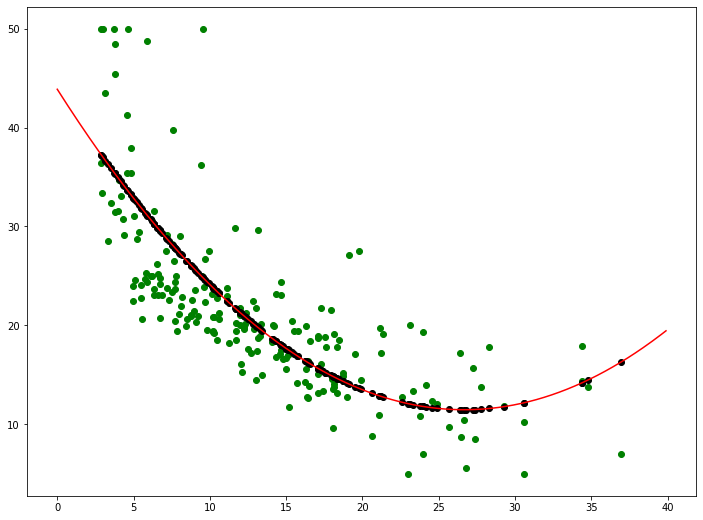

In [149]:
plt.figure(figsize=(12, 9))
plt.scatter(X_test, y_test,  color='green')
plt.scatter(X_test, y_pred2,  color='black')
plt.plot(x_axis, f_x2,  color='red')

## Lets test third and fifth degree polynomials

In [137]:
poly3 = PolynomialFeatures(3)
X_train3 = poly3.fit_transform(X_train)
X_test3 = poly3.transform(X_test)
X_test3

array([[1.00000000e+00, 9.04000000e+00, 8.17216000e+01, 7.38763264e+02],
       [1.00000000e+00, 3.53000000e+00, 1.24609000e+01, 4.39869770e+01],
       [1.00000000e+00, 1.80700000e+01, 3.26524900e+02, 5.90030494e+03],
       [1.00000000e+00, 5.52000000e+00, 3.04704000e+01, 1.68196608e+02],
       [1.00000000e+00, 1.72700000e+01, 2.98252900e+02, 5.15082758e+03],
       [1.00000000e+00, 1.19700000e+01, 1.43280900e+02, 1.71507237e+03],
       [1.00000000e+00, 1.83300000e+01, 3.35988900e+02, 6.15867654e+03],
       [1.00000000e+00, 2.41600000e+01, 5.83705600e+02, 1.41023273e+04],
       [1.00000000e+00, 1.28700000e+01, 1.65636900e+02, 2.13174690e+03],
       [1.00000000e+00, 1.43300000e+01, 2.05348900e+02, 2.94264974e+03],
       [1.00000000e+00, 1.79200000e+01, 3.21126400e+02, 5.75458509e+03],
       [1.00000000e+00, 1.71000000e+01, 2.92410000e+02, 5.00021100e+03],
       [1.00000000e+00, 3.69800000e+01, 1.36752040e+03, 5.05709044e+04],
       [1.00000000e+00, 1.23400000e+01, 1.52275600e

In [151]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()
model3.fit(X_train3, y_train)

y_train_pred3 = model3.predict(X_train3)

print("RMSE: {0}".format(mean_squared_error(y_train, y_train_pred3, squared=False)))
print('Variance score: %.2f' % r2_score(y_train, y_train_pred3))

y_pred3 = model3.predict(X_test3)

print("RMSE: {0}".format(mean_squared_error(y_test, y_pred3, squared=False)))
print('Variance score: %.2f' % r2_score(y_test, y_pred3))

RMSE: 5.401404137708936
Variance score: 0.67
RMSE: 5.358464286134489
Variance score: 0.62


In [142]:
poly5 = PolynomialFeatures(5)
X_train5 = poly5.fit_transform(X_train)
X_test5 = poly5.transform(X_test)

model5 = LinearRegression()
model5.fit(X_train5, y_train)

y_train_pred5 = model5.predict(X_train5)

print("RMSE: {0}".format(mean_squared_error(y_train, y_train_pred5, squared=False)))
print('Variance score: %.2f' % r2_score(y_train, y_train_pred5))

y_pred5 = model5.predict(X_test5)

print("RMSE: {0}".format(mean_squared_error(y_test, y_pred5, squared=False)))
print('Variance score: %.2f' % r2_score(y_test, y_pred5))

RMSE: 5.204387432514541
Variance score: 0.70
RMSE: 5.182591430994353
Variance score: 0.65


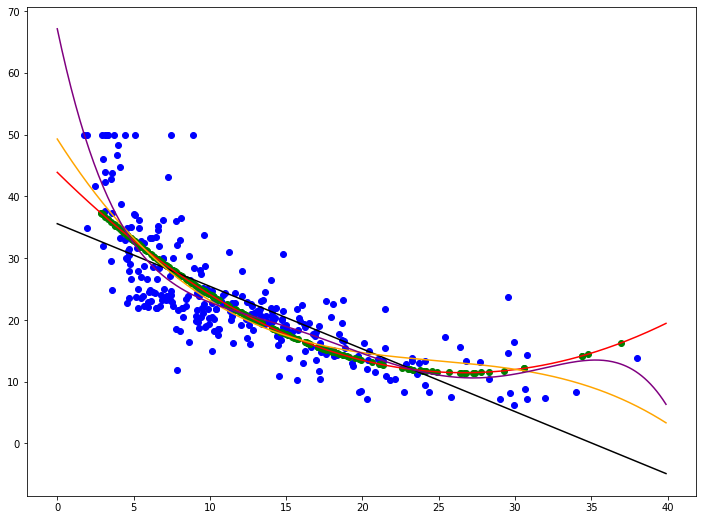

In [154]:
x_axis = np.arange(0, 40, 0.1)
f_x3 = model3.intercept_[0] + model3.coef_[0][1] * x_axis + model3.coef_[0][2] * x_axis**2 + model3.coef_[0][3] * x_axis**3
f_x5 = model5.intercept_[0] + model5.coef_[0][1] * x_axis + model5.coef_[0][2] * x_axis**2 + model5.coef_[0][3] * x_axis**3  + model5.coef_[0][4] * x_axis**4 + model5.coef_[0][5] * x_axis**5

plt.figure(figsize=(12, 9))
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_pred2,  color='green')
plt.plot(x_axis, f_x,  color='black')
plt.plot(x_axis, f_x2,  color='red')
plt.plot(x_axis, f_x3,  color='orange')
plt.plot(x_axis, f_x5,  color='purple')